In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Data Cleaning

In [13]:
df = pd.read_csv("american_bankruptcy.csv")
df.describe()
df.head()
df.info()
print("Duplicates:", df.duplicated().sum())
print("NULLS:", df.isnull().sum().sum())
print("NAs:", df.isna().sum().sum())

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [14]:
df["X9"].equals(df["X16"])

True

In [15]:
df = df.drop('X16', axis=1)

In [16]:
alive_count = df['status_label'].value_counts()['alive']
failed_count = df['status_label'].value_counts()['failed']
total_count = alive_count + failed_count
alive_ratio = alive_count / total_count
failed_ratio = failed_count / total_count

print(df['status_label'].value_counts())
print("Alive Ratio:", alive_ratio) #93%
print("Failed Ratio:", failed_ratio) #6%

status_label
alive     73462
failed     5220
Name: count, dtype: int64
Alive Ratio: 0.9336569990595054
Failed Ratio: 0.06634300094049465


# Random Forest
## No balancing or tuning

In [17]:
X = df.drop(columns=["status_label", "company_name", "year"])  # Features (all columns except status_label)
y = df["status_label"]  # Target column

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (62945, 17)
X_test shape: (15737, 17)
y_train shape: (62945,)
y_test shape: (15737,)


In [18]:
num_features = X_train.shape[1]
rsf_size = max(1, num_features // 3)

print(rsf_size)

rf_grid = RandomForestClassifier(random_state=99,max_features=rsf_size)
gr_space = {
    'n_estimators': [500]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train, y_train)

5
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ..................n_estimators=500;, score=0.937 total time= 1.6min
[CV 2/3] END ..................n_estimators=500;, score=0.937 total time= 1.6min
[CV 3/3] END ..................n_estimators=500;, score=0.937 total time= 1.6min


Accuracy on train set: 1.0
Accuracy on test set: 0.9372815657367987

Classification Report on test set:
              precision    recall  f1-score   support

       alive       0.94      1.00      0.97     14678
      failed       0.99      0.07      0.13      1059

    accuracy                           0.94     15737
   macro avg       0.96      0.53      0.55     15737
weighted avg       0.94      0.94      0.91     15737



<Axes: >

<Axes: >

Precision: 0.9865
Recall: 0.0689
False Positives (FP): 1
False Negatives (FN): 986
True Positives (TP): 73
True Negatives (TN): 14677


<Figure size 1000x500 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'X8'),
  Text(1, 0, 'X15'),
  Text(2, 0, 'X3'),
  Text(3, 0, 'X1'),
  Text(4, 0, 'X7'),
  Text(5, 0, 'X13'),
  Text(6, 0, 'X17'),
  Text(7, 0, 'X6'),
  Text(8, 0, 'X10'),
  Text(9, 0, 'X14'),
  Text(10, 0, 'X2'),
  Text(11, 0, 'X5'),
  Text(12, 0, 'X11'),
  Text(13, 0, 'X18'),
  Text(14, 0, 'X4'),
  Text(15, 0, 'X12'),
  Text(16, 0, 'X9')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance Score')

Text(0.5, 1.0, 'Feature Importances in Random Forest')

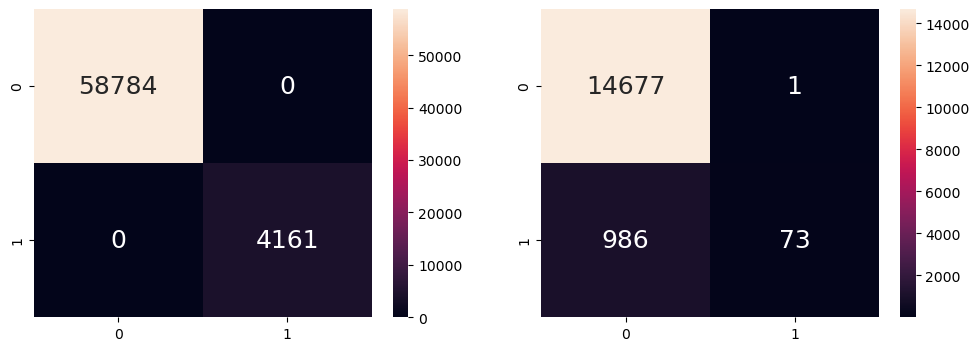

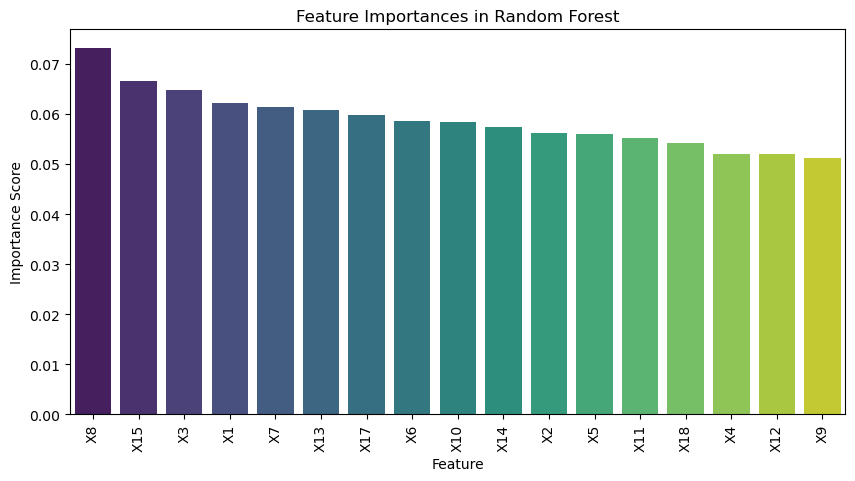

In [19]:
y_train_pred = model_grid.predict(X_train)
y_test_pred = model_grid.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Compute precision and recall
precision = precision_score(y_test, y_test_pred, pos_label="failed")
recall = recall_score(y_test, y_test_pred, pos_label="failed")

# Compute confusion matrix
y_test_bin = (y_test == "failed").astype(int)
y_pred_bin = (y_test_pred == "failed").astype(int) 
cm = confusion_matrix(y_test_bin, y_pred_bin)
tn, fp, fn, tp = cm.ravel()

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")

# Plot Feature Importances
feature_importances = model_grid.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=np.array(X_train.columns)[sorted_idx], y=feature_importances[sorted_idx], palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances in Random Forest")
plt.show()

## Undersampling on train-set

In [22]:
import pandas as pd
from sklearn.utils import resample

# Combine X_train and y_train for downsampling
train_df = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes in the training set
df_majority = train_df[train_df.status_label == "alive"]
df_minority = train_df[train_df.status_label == "failed"]

# Downsample the majority class in the training set
df_majority_downsampled = resample(
    df_majority, 
    replace=False, 
    n_samples=len(df_minority), 
    random_state=99
)

# Combine the downsampled majority class with the minority class
train_balanced = pd.concat([df_majority_downsampled, df_minority])

# Separate features and labels again
X_train_re = train_balanced.drop(columns=["status_label"])
y_train_re = train_balanced["status_label"]

In [23]:
num_features = X_train_re.shape[1]
rsf_size = max(1, num_features // 3)

print(rsf_size)

rf_grid = RandomForestClassifier(random_state=99,max_features=rsf_size)
gr_space = {
    'n_estimators': [500]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train_re, y_train_re)

5
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ..................n_estimators=500;, score=0.728 total time=   7.2s
[CV 2/3] END ..................n_estimators=500;, score=0.730 total time=   7.6s
[CV 3/3] END ..................n_estimators=500;, score=0.731 total time=   8.4s


Accuracy on train set: 1.0
Accuracy on test set: 0.7279023956281375

Classification Report on test set:
              precision    recall  f1-score   support

       alive       0.98      0.72      0.83     14678
      failed       0.17      0.78      0.28      1059

    accuracy                           0.73     15737
   macro avg       0.57      0.75      0.56     15737
weighted avg       0.92      0.73      0.80     15737



<Axes: >

<Axes: >

Precision: 0.1690
Recall: 0.7771
False Positives (FP): 4046
False Negatives (FN): 236
True Positives (TP): 823
True Negatives (TN): 10632


<Figure size 1000x500 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'X8'),
  Text(1, 0, 'X6'),
  Text(2, 0, 'X15'),
  Text(3, 0, 'X3'),
  Text(4, 0, 'X1'),
  Text(5, 0, 'X7'),
  Text(6, 0, 'X17'),
  Text(7, 0, 'X13'),
  Text(8, 0, 'X2'),
  Text(9, 0, 'X14'),
  Text(10, 0, 'X11'),
  Text(11, 0, 'X12'),
  Text(12, 0, 'X10'),
  Text(13, 0, 'X5'),
  Text(14, 0, 'X18'),
  Text(15, 0, 'X4'),
  Text(16, 0, 'X9')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance Score')

Text(0.5, 1.0, 'Feature Importances in Random Forest')

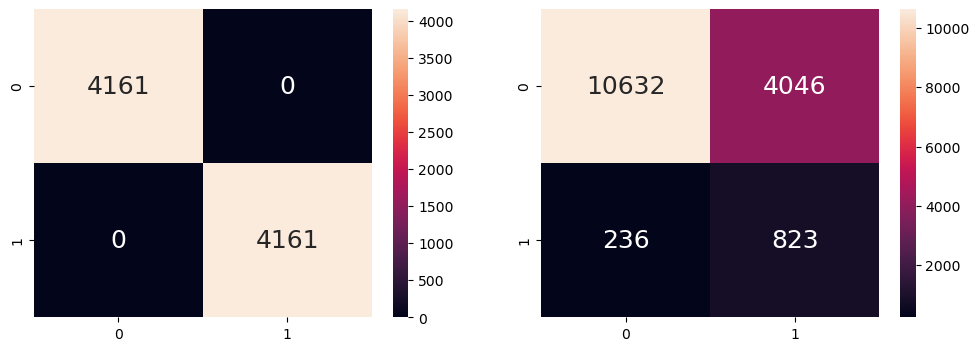

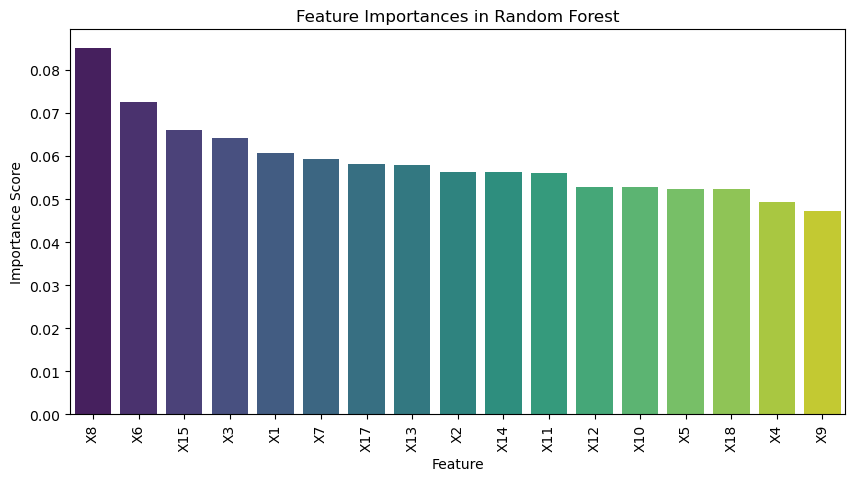

In [24]:
y_train_pred = model_grid.predict(X_train_re)
y_test_pred = model_grid.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_train_re, y_train_pred)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train_re, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Compute precision and recall
precision = precision_score(y_test, y_test_pred, pos_label="failed")
recall = recall_score(y_test, y_test_pred, pos_label="failed")

# Compute confusion matrix
y_test_bin = (y_test == "failed").astype(int)
y_pred_bin = (y_test_pred == "failed").astype(int) 
cm = confusion_matrix(y_test_bin, y_pred_bin)
tn, fp, fn, tp = cm.ravel()

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")

# Plot Feature Importances
feature_importances = model_grid.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=np.array(X_train_re.columns)[sorted_idx], y=feature_importances[sorted_idx], palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances in Random Forest")
plt.show()

### Threshold Tuning

In [25]:
y_probs = model_grid.predict_proba(X_test)[:, 1]

In [26]:
from sklearn.metrics import roc_curve
import numpy as np

fpr, tpr, thresholds = roc_curve(y_test_bin, y_probs)

# Choose the threshold that gives the best recall-precision tradeoff
best_threshold = thresholds[np.argmax(tpr - fpr)]

print(f"Optimal Threshold: {best_threshold}")

Optimal Threshold: 0.524


In [27]:
new_threshold = 0.524
y_pred_adjusted = (y_probs > new_threshold).astype(int)

[0 1]
              precision    recall  f1-score   support

           0       0.98      0.76      0.86     14678
           1       0.19      0.75      0.30      1059

    accuracy                           0.76     15737
   macro avg       0.58      0.75      0.58     15737
weighted avg       0.92      0.76      0.82     15737

Accuracy on test set: 0.761580987481731


<Axes: >

<Axes: >

Precision: 0.1850
Recall: 0.7469
False Positives (FP): 3484
False Negatives (FN): 268
True Positives (TP): 791
True Negatives (TN): 11194


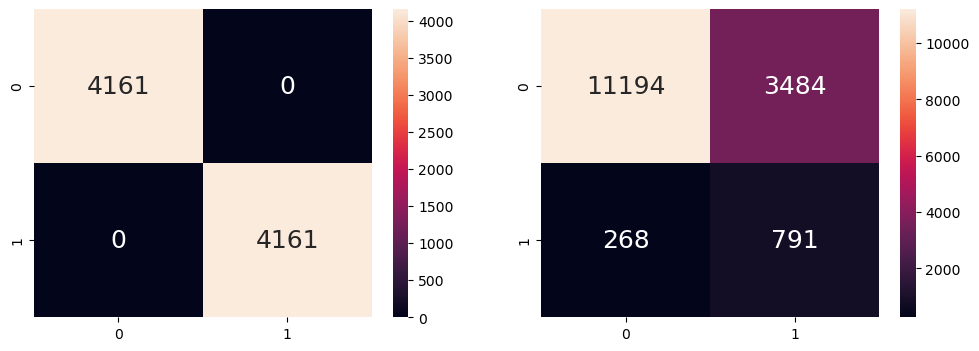

In [28]:
from sklearn.metrics import classification_report
y_test_bin = (y_test == "failed").astype(int)
print(np.unique(y_pred_adjusted))  # Should only contain 0 and 1
print(classification_report(y_test_bin, y_pred_adjusted))

accuracy = accuracy_score(y_test_bin, y_pred_adjusted)
print("Accuracy on test set:", accuracy)

# Compute the confusion matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train_re, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test_bin, y_pred_adjusted),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Compute precision and recall
precision = precision_score(y_test_bin, y_pred_adjusted)
recall = recall_score(y_test_bin, y_pred_adjusted)

# Compute confusion matrix
y_test_bin = (y_test == "failed").astype(int)  # Convert "failed" → 1, "alive" → 0
y_pred_bin = (y_test_pred == "failed").astype(int) 
cm = confusion_matrix(y_test_bin, y_pred_adjusted)
tn, fp, fn, tp = cm.ravel()

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")

## SMOTE (with adjusted sampling strategy)

In [29]:
smote = SMOTE(random_state=99,sampling_strategy=0.5)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

In [30]:
num_features = X_train.shape[1]
rsf_size = max(1, num_features // 3)

print(rsf_size)

rf_grid = RandomForestClassifier(random_state=99,max_features=rsf_size)
gr_space = {
    'n_estimators': [500],
    'min_samples_leaf':[1,3,5]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train_SMOTE, y_train_SMOTE)

5
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END min_samples_leaf=1, n_estimators=500;, score=0.925 total time= 2.0min
[CV 2/3] END min_samples_leaf=1, n_estimators=500;, score=0.945 total time= 2.0min
[CV 3/3] END min_samples_leaf=1, n_estimators=500;, score=0.945 total time= 2.0min
[CV 1/3] END min_samples_leaf=3, n_estimators=500;, score=0.909 total time= 2.0min
[CV 2/3] END min_samples_leaf=3, n_estimators=500;, score=0.933 total time= 1.9min
[CV 3/3] END min_samples_leaf=3, n_estimators=500;, score=0.933 total time= 2.0min
[CV 1/3] END min_samples_leaf=5, n_estimators=500;, score=0.895 total time= 2.0min
[CV 2/3] END min_samples_leaf=5, n_estimators=500;, score=0.920 total time= 1.8min
[CV 3/3] END min_samples_leaf=5, n_estimators=500;, score=0.919 total time= 1.8min


Accuracy on train set: 1.0
Accuracy on test set: 0.9366461206074855

Classification Report on test set:
              precision    recall  f1-score   support

       alive       0.95      0.98      0.97     14678
      failed       0.54      0.36      0.43      1059

    accuracy                           0.94     15737
   macro avg       0.75      0.67      0.70     15737
weighted avg       0.93      0.94      0.93     15737



<Axes: >

<Axes: >

Precision: 0.5445
Recall: 0.3579
False Positives (FP): 317
False Negatives (FN): 680
True Positives (TP): 379
True Negatives (TN): 14361


<Figure size 1000x500 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'X8'),
  Text(1, 0, 'X11'),
  Text(2, 0, 'X15'),
  Text(3, 0, 'X5'),
  Text(4, 0, 'X6'),
  Text(5, 0, 'X3'),
  Text(6, 0, 'X13'),
  Text(7, 0, 'X17'),
  Text(8, 0, 'X2'),
  Text(9, 0, 'X1'),
  Text(10, 0, 'X7'),
  Text(11, 0, 'X10'),
  Text(12, 0, 'X18'),
  Text(13, 0, 'X14'),
  Text(14, 0, 'X9'),
  Text(15, 0, 'X12'),
  Text(16, 0, 'X4')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance Score')

Text(0.5, 1.0, 'Feature Importances in Random Forest')

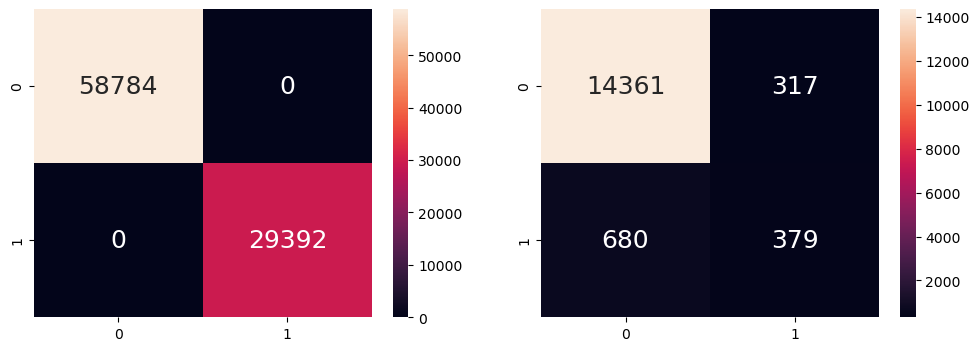

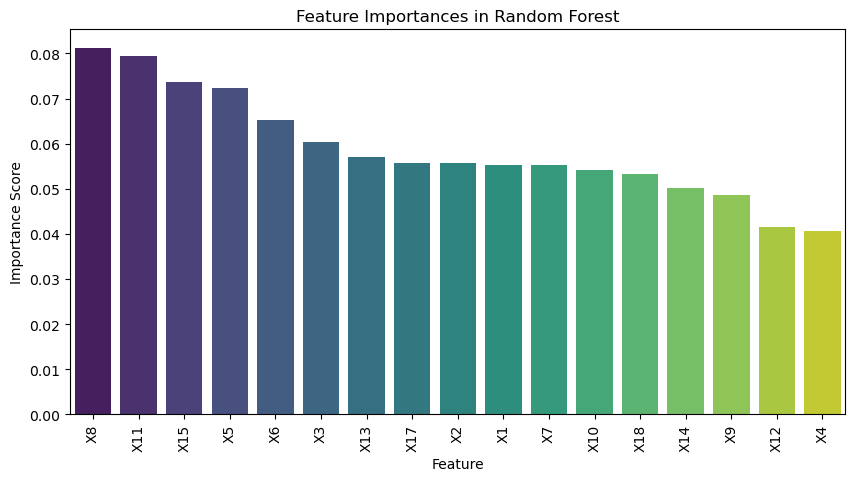

In [31]:
y_train_pred = model_grid.predict(X_train_SMOTE)
y_test_pred = model_grid.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_train_SMOTE, y_train_pred)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train_SMOTE, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Compute precision and recall
precision = precision_score(y_test, y_test_pred, pos_label="failed")
recall = recall_score(y_test, y_test_pred, pos_label="failed")

# Compute confusion matrix
y_test_bin = (y_test == "failed").astype(int)  # Convert "failed" → 1, "alive" → 0
y_pred_bin = (y_test_pred == "failed").astype(int) 
cm = confusion_matrix(y_test_bin, y_pred_bin)
tn, fp, fn, tp = cm.ravel()

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")

# Plot Feature Importances
feature_importances = model_grid.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=np.array(X_train_SMOTE.columns)[sorted_idx], y=feature_importances[sorted_idx], palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances in Random Forest")
plt.show()

In [32]:
y_probs = model_grid.predict_proba(X_test)[:, 1]

In [35]:
from sklearn.metrics import roc_curve
import numpy as np

fpr, tpr, thresholds = roc_curve(y_test_bin, y_probs)

# Choose the threshold that gives the best recall-precision tradeoff
best_threshold = thresholds[np.argmax(tpr - fpr)]

print(f"Optimal Threshold: {best_threshold}")

Optimal Threshold: 0.212


In [41]:
new_threshold = 0.212
y_pred_adjusted = (y_probs > new_threshold).astype(int)

[0 1]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     14678
           1       0.20      0.78      0.32      1059

    accuracy                           0.78     15737
   macro avg       0.59      0.78      0.59     15737
weighted avg       0.93      0.78      0.83     15737

Accuracy on test set: 0.777657749253352


<Axes: >

<Axes: >

Precision: 0.2021
Recall: 0.7819
False Positives (FP): 3268
False Negatives (FN): 231
True Positives (TP): 828
True Negatives (TN): 11410


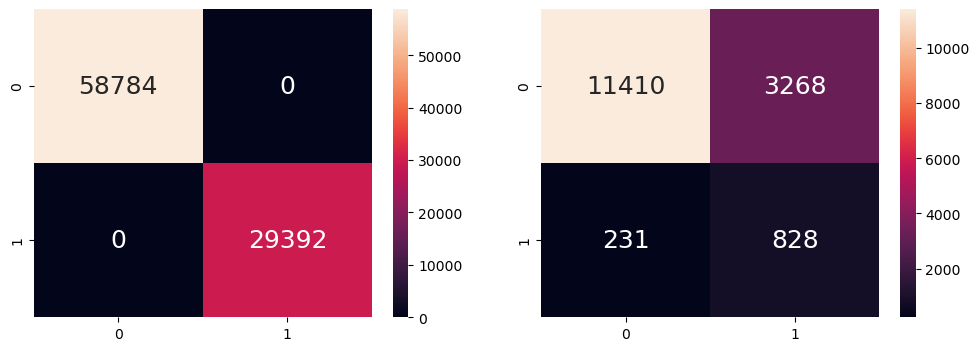

In [42]:
from sklearn.metrics import classification_report
y_test_bin = (y_test == "failed").astype(int)
print(np.unique(y_pred_adjusted))  # Should only contain 0 and 1
print(classification_report(y_test_bin, y_pred_adjusted))

accuracy = accuracy_score(y_test_bin, y_pred_adjusted)
print("Accuracy on test set:", accuracy)

# Compute the confusion matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train_SMOTE, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test_bin, y_pred_adjusted),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Compute precision and recall
precision = precision_score(y_test_bin, y_pred_adjusted)
recall = recall_score(y_test_bin, y_pred_adjusted)

# Compute confusion matrix
y_test_bin = (y_test == "failed").astype(int)  # Convert "failed" → 1, "alive" → 0
y_pred_bin = (y_test_pred == "failed").astype(int) 
cm = confusion_matrix(y_test_bin, y_pred_adjusted)
tn, fp, fn, tp = cm.ravel()

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")

# Z-Score

## Assuming 'Grey' Zone is Alive

In [44]:
df2 = pd.read_csv("american_bankruptcy.csv")
df2['ZX1'] = (df2["X1"] - df2["X14"]) / df2["X10"] # (Current Assets - Current Liabilities) / Total Assets
df2['ZX2'] = df2['X15']/df2['X10'] # Retained Earnings / Total Assets
df2['ZX3'] = df2["X12"]/df2['X10'] # EBIT / Total Assets
df2['ZX4'] = df2['X8']/df2['X17'] # Market Captitalization / Total Liabilities
df2['ZX5'] = df2['X9']/df2['X10'] # Sales / Total Assets

df2["Z"] = 1.2*df2["ZX1"] + 1.4*df2["ZX2"] + 3.3*df2["ZX3"] + 0.6*df2["ZX4"] + 1*df2["ZX5"]


# Define conditions
conditions = [
    df2["Z"] < 1.8,  # High risk
    df2["Z"] > 3.0   # Low risk
]

# Define corresponding labels
labels = ['High', 'Low']

# Create the column using np.select, with default as 'Grey'
df2["Z_pred"] = np.select(conditions, labels, default='Grey')

# Remove unnecessary columns 
df2 = df2[["year","status_label","ZX1","ZX2","ZX3","ZX4","ZX5","Z","Z_pred"]]
df2.head()
df2["Z_pred"].value_counts()

,year,status_label,ZX1,ZX2,ZX3,ZX4,ZX5,Z,Z_pred
0,1999,alive,0.468896,0.271291,0.095355,0.928438,1.382369,3.196587,Low
1,2000,alive,0.513588,0.290751,0.065241,1.042794,1.245637,3.109968,Low
2,2001,alive,0.402974,0.196569,0.006633,0.911564,0.899355,2.226949,Grey
3,2002,alive,0.280849,0.180749,0.005204,0.365979,0.883074,1.709901,High
4,2003,alive,0.424286,0.185938,0.029341,0.757853,0.919167,2.240159,Grey


Z_pred
Low     36479
High    28667
Grey    13536
Name: count, dtype: int64

### Whole Dataset

Z_pred
0    50015
1    28667
Name: count, dtype: int64

Classification Report of Z-Score Model:
               precision    recall  f1-score   support

           0       0.95      0.65      0.77     73462
           1       0.10      0.55      0.17      5220

    accuracy                           0.64     78682
   macro avg       0.53      0.60      0.47     78682
weighted avg       0.90      0.64      0.73     78682



<Axes: >

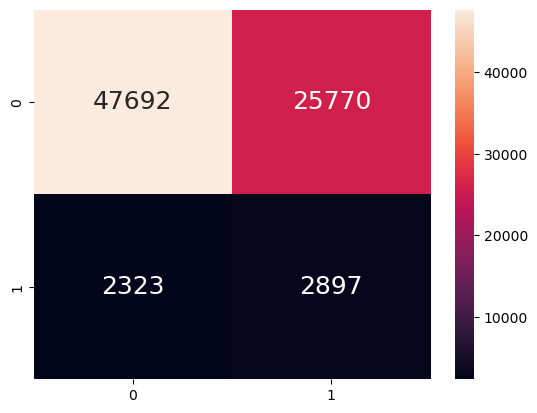

In [45]:
# assume grey and low risk is alive, high risk is failed
df2['Z_pred'] = df2['Z_pred'].apply(lambda x: 1 if x == 'High' else 0)

# Look at distribution
df2['Z_pred'].value_counts()

# Convert true y values to 0 and 1
true_y = df2["status_label"].map({"alive": 0, "failed": 1})
print("Classification Report of Z-Score Model:\n", classification_report(true_y, df2['Z_pred']))
sns.heatmap(confusion_matrix(true_y, df2['Z_pred']),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

### Test Set

Z_pred
0    9940
1    5797
Name: count, dtype: int64

,year,status_label,ZX1,ZX2,ZX3,ZX4,ZX5,Z,Z_pred
56683,2017,alive,0.157928,-1.103828,0.100105,2.490247,0.505917,0.974568,1
16340,2000,alive,0.274760,0.172795,0.043170,0.922913,1.478186,2.746020,0
1910,2011,alive,0.198876,0.104602,0.210882,3.363780,0.736791,3.836064,0
11872,2005,alive,0.044529,0.181722,0.156070,2.867974,1.140494,3.684154,0
17235,2008,alive,0.002730,0.155273,0.072517,0.846041,0.354252,1.321843,1


Classification Report of Z-Score Model:
               precision    recall  f1-score   support

           0       0.96      0.65      0.77     14678
           1       0.11      0.58      0.18      1059

    accuracy                           0.64     15737
   macro avg       0.53      0.62      0.48     15737
weighted avg       0.90      0.64      0.73     15737



<Axes: >

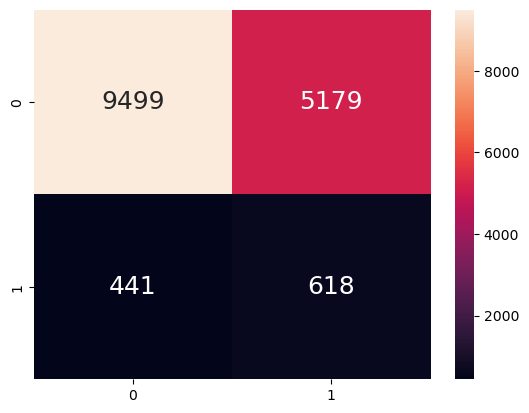

In [47]:
df_test = pd.concat([X_test, y_test], axis=1)
# Use the same indexes as in test set and apply to this new modified dataset
df2_test = df2.loc[df_test.index]

# assume grey and low risk is alive, high risk is failed
df2_test['Z_pred'].value_counts()

# Convert true y values to 0 and 1
true_y = df2_test["status_label"].map({"alive": 0, "failed": 1})

df2_test.head()
print("Classification Report of Z-Score Model:\n", classification_report(true_y, df2_test['Z_pred']))
sns.heatmap(confusion_matrix(true_y, df2_test['Z_pred']),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

## Assuming 'Grey' Zone is Failed

In [48]:
df2 = pd.read_csv("american_bankruptcy.csv")
df2['ZX1'] = (df2["X1"] - df2["X14"]) / df2["X10"] # (Current Assets - Current Liabilities) / Total Assets
df2['ZX2'] = df2['X15']/df2['X10'] # Retained Earnings / Total Assets
df2['ZX3'] = df2["X12"]/df2['X10'] # EBIT / Total Assets
df2['ZX4'] = df2['X8']/df2['X17'] # Market Captitalization / Total Liabilities
df2['ZX5'] = df2['X9']/df2['X10'] # Sales / Total Assets

df2["Z"] = 1.2*df2["ZX1"] + 1.4*df2["ZX2"] + 3.3*df2["ZX3"] + 0.6*df2["ZX4"] + 1*df2["ZX5"]


# Define conditions
conditions = [
    df2["Z"] < 1.8,  # High risk
    df2["Z"] > 3.0   # Low risk
]

# Define corresponding labels
labels = ['High', 'Low']

# Create the column using np.select, with default as 'Grey'
df2["Z_pred"] = np.select(conditions, labels, default='Grey')

# Remove unnecessary columns 
df2 = df2[["year","status_label","ZX1","ZX2","ZX3","ZX4","ZX5","Z","Z_pred"]]
df2.head()
df2["Z_pred"].value_counts()

,year,status_label,ZX1,ZX2,ZX3,ZX4,ZX5,Z,Z_pred
0,1999,alive,0.468896,0.271291,0.095355,0.928438,1.382369,3.196587,Low
1,2000,alive,0.513588,0.290751,0.065241,1.042794,1.245637,3.109968,Low
2,2001,alive,0.402974,0.196569,0.006633,0.911564,0.899355,2.226949,Grey
3,2002,alive,0.280849,0.180749,0.005204,0.365979,0.883074,1.709901,High
4,2003,alive,0.424286,0.185938,0.029341,0.757853,0.919167,2.240159,Grey


Z_pred
Low     36479
High    28667
Grey    13536
Name: count, dtype: int64

Z_pred
1    42203
0    36479
Name: count, dtype: int64

Classification Report of Z-Score Model:
               precision    recall  f1-score   support

           0       0.96      0.48      0.64     73462
           1       0.09      0.72      0.16      5220

    accuracy                           0.49     78682
   macro avg       0.52      0.60      0.40     78682
weighted avg       0.90      0.49      0.61     78682



<Axes: >

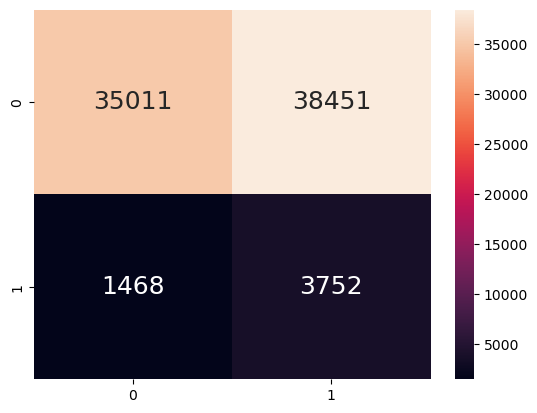

In [49]:
# assume grey and low risk is alive, high risk is failed
df2['Z_pred'] = df2['Z_pred'].apply(lambda x: 0 if x == 'Low' else 1)

# See class distribution
df2['Z_pred'].value_counts()

# Convert true y values to 0 and 1
true_y = df2["status_label"].map({"alive": 0, "failed": 1})
print("Classification Report of Z-Score Model:\n", classification_report(true_y, df2['Z_pred']))
sns.heatmap(confusion_matrix(true_y, df2['Z_pred']),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

Z_pred
1    8481
0    7256
Name: count, dtype: int64

,year,status_label,ZX1,ZX2,ZX3,ZX4,ZX5,Z,Z_pred
56683,2017,alive,0.157928,-1.103828,0.100105,2.490247,0.505917,0.974568,1
16340,2000,alive,0.274760,0.172795,0.043170,0.922913,1.478186,2.746020,1
1910,2011,alive,0.198876,0.104602,0.210882,3.363780,0.736791,3.836064,0
11872,2005,alive,0.044529,0.181722,0.156070,2.867974,1.140494,3.684154,0
17235,2008,alive,0.002730,0.155273,0.072517,0.846041,0.354252,1.321843,1


Classification Report of Z-Score Model:
               precision    recall  f1-score   support

           0       0.96      0.47      0.64     14678
           1       0.09      0.73      0.16      1059

    accuracy                           0.49     15737
   macro avg       0.53      0.60      0.40     15737
weighted avg       0.90      0.49      0.60     15737



<Axes: >

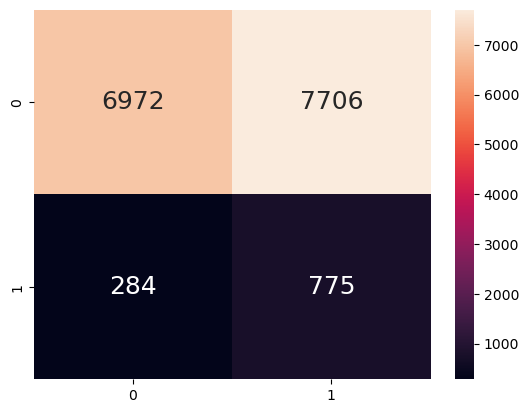

In [50]:
# Use the same indexes as in test set and apply to this new modified dataset
df2_test = df2.loc[df_test.index]

# assume grey and low risk is alive, high risk is failed
df2_test['Z_pred'].value_counts()

# Convert true y values to 0 and 1
true_y = df2_test["status_label"].map({"alive": 0, "failed": 1})

df2_test.head()
print("Classification Report of Z-Score Model:\n", classification_report(true_y, df2_test['Z_pred']))
sns.heatmap(confusion_matrix(true_y, df2_test['Z_pred']),
                   annot = True, fmt=".0f", annot_kws={"size": 18})